# <span style="color:darkblue"> QTM 151 - Quiz 5 </span>

## Try to submit as an HTML file

<font size = "5">
Print your name below

In [1]:
# Write your answer here

print("Simren Kochhar")

Simren Kochhar


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Write the following message as a comment: <br>

"I will abide by Emory's code of conduct"


In [2]:
# Write your own code

#I will abide by Emory's code of conduct

<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [3]:
# Write your answer here

import pandas as pd
import matplotlib.pyplot as plt


In this quiz, we will work with a World Bank <br>
dataset on the proportion of urban population across <br>
countries, from 2016-2020.

- This is an example of a "panel"/"longitudinal" dataset <br>
 which contains information about the same unit (country) <br>
 over time.
 - This is in "long" format (see Lecture 22)


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import "data_raw/wdi_long.csv"
- Create a new column called "date" which uses ```pd.to_datetime(...,format = ...)``` <br>
to convert year to a date format
- To get full points use wild cards to establish the format. To get full points,<br>
 set the "format" option using wildcards as in Lecture 20.


In [4]:
# Write your own code

wdi_long = pd.read_csv("data_raw/wdi_long.csv")
wdi_long["date"] = pd.to_datetime(wdi_long["year"], format = "%Y")



<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Sort ```wdi_long``` by ```country_name``` and ```year``` in ascending order. <br>
Call this new dataset, ```wdi_sorted```

HINT: See Lecture 10a for how to sort. You can sort by multiple <br>
variables by entering them as a list ```[[...]]``` <br>

NOTE: Sorting is very important when using time series data, <br>
particularly for plotting and data cleaning, since observations are ordered <br>
in sequence from earliest to latest.



In [5]:
# Write your own code

wdi_sorted = wdi_long.sort_values(["country_name","year"],ascending = True)


<font size = "5">

(c) Flag subset of data and plot

<font size = "3">

- For the sorted dataset, subset all entries of ```wdi_sorted``` from part (b) <br>
 where ```country_name``` to equal ```"United States"``` using ```.query()```. <br>
Call this new dataset ```wdi_usa```
- Create a line plot with year on the x-axis and ```prop_urban``` on the y-axis
- Label the x-axis, the y-axis, and the title

HINT: You can use ```.query()``` to subset to "United States" by using <br>
escape characters, e.g. ``` country_name == \"United States\" ```.  <br>
See Lecture 10a for how to use query.


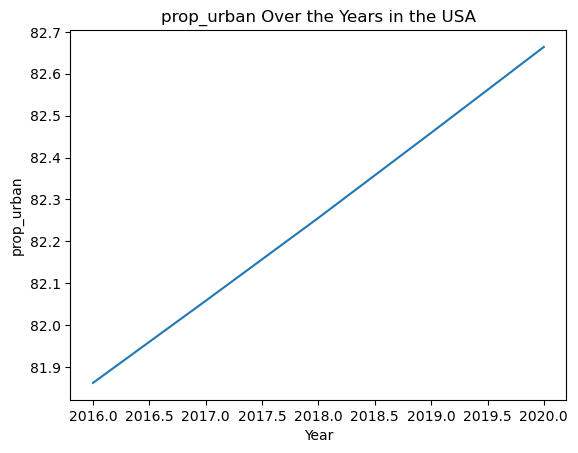

In [6]:
# Write your own code

wdi_usa = wdi_sorted.query("country_name == \"United States\"")

plt.plot("year", "prop_urban", data = wdi_usa)
plt.xlabel("Year")
plt.ylabel("prop_urban")
plt.title("prop_urban Over the Years in the USA")
plt.show()

<font size = "5">

(d) Obtain yearly growth rates by country

<font size = "3">

- For this question you will use ```wdi_sorted``` that you created in part (b)
- Use ```.groupby()```, ```.diff()```, and ```.shift()``` to compute <br>
the yearly growth rates in the urban population by country. 
- Store your results in a new column of ```wdi_sorted``` called <br>
``` growth_prop_urban```. 

HINT: See Lecture 22


In [19]:
# Write your own code

wdi_sorted["lag_urban"]    = wdi_sorted.groupby("country_name")["prop_urban"].shift(1)
wdi_sorted["diff_urban"] = wdi_sorted.groupby("country_name")["prop_urban"].diff()

wdi_sorted["growth_prop_urban"] = (wdi_sorted["diff_urban"]/wdi_sorted["lag_urban"])* 100


<font size = "5">

(e) Obtain average yearly growth rates

<font size = "3">

- This question follows-up to part (d).
- Use ```.groupby()```, ```.agg()``` to compute the average of ```growth_prop_urban```

HINT: See Lecture 14 for how to compute grouped statistics. <br>


In [10]:
# Write your own code

growth_urban_agg = (wdi_sorted.groupby("year")
                      .agg(mean_growth_urban = ('growth_prop_urban','mean')))

growth_urban_agg

,mean_growth_urban
year,
2016,20.142411
2017,0.609406
2018,0.616170
2019,0.622746
2020,0.629699


<font size = "5">

(f) Convert dataset to wide format

<font size = "3">

- Convert "wdi_sorted" from long to wide, using the following arguments: <br>
```
   index = 'country_name'
   columns = 'year'
   values =  'prop_urban'
```
- Display the dataset to check that it is in wide format

HINT: See Lecture 22 for details on how to use ```pd.pivot()```

In [9]:
# Write your own code


wdi_wide = (pd.pivot(wdi_long,
                           index = 'country_name',
                           columns = 'year',
                           values =  'prop_urban'))

display(wdi_wide)

year,2016,2017,2018,2019,2020
country_name,,,,,
Afghanistan,25.020,25.250,25.495,25.754,26.026
Albania,58.421,59.383,60.319,61.229,62.112
Algeria,71.459,72.052,72.629,73.189,73.733
American Samoa,87.198,87.170,87.153,87.147,87.153
Andorra,88.248,88.150,88.062,87.984,87.916
...,...,...,...,...,...
Virgin Islands (U.S.),95.480,95.603,95.721,95.832,95.939
West Bank and Gaza,75.628,75.894,76.164,76.440,76.719
"Yemen, Rep.",35.394,36.016,36.642,37.273,37.908
